In [25]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D
# Entry : non linear dataset
# GOAL OF EXERCICE :
# Adding non linear feature (polynome) to dataset in order to do a linear regression of the augmented dataset
# and having a good approximation of non linear dataset via linear regression tools

In [54]:
# GENERATING QUICK NON LINEAR DATASET -1
def f(x): # x * cos(x) + noise from gaussian
    return x * np.cos(x) + np.random.normal(size=500) *2

#generate 500 equi-points from 0 to 10
x = np.linspace(0,10,500)
print (x.shape)
print(x[:10])

# generate a randomiser and shuffle X table
rng = np.random.RandomState(0)
rng.shuffle(x)
print(x[:10])


(500,)
[0.         0.02004008 0.04008016 0.06012024 0.08016032 0.1002004
 0.12024048 0.14028056 0.16032064 0.18036072]
[1.80360721 5.09018036 5.67134269 8.91783567 9.23847695 0.3006012
 6.33266533 9.7995992  3.18637275 3.06613226]


[0.         0.02004008 0.04008016 0.06012024 0.08016032 0.1002004
 0.12024048 0.14028056 0.16032064 0.18036072]
[ 0.6062816   0.47945876  1.53880473  5.19760045 -1.91459646  2.89580599
 -2.54309412 -5.80018513  0.38037749 -1.44833416]


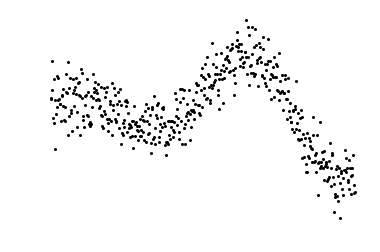

In [55]:
# GENERATING QUICK NON LINEAR DATASET -2
#sorting function (write like this return X in state before randomisation)
x = np.sort(x[:])
print(x[:10])

#generate Y from defined function
y=f(x)
print(y[:10])

#create plot versions of X and y arrays
plt.plot(x,y, 'o', color='black',markersize =2)
plt.axis('off')
plt.show()

In [56]:
# TRY TO DO A NON LINEAR REGRESSION ON THE DATASET

# dataset look polynomial, adding polynomial component to dataset
# NEED TO TRANSPOSE to have the good shape [500 x 5]
x_augmented = np.array([x, x**2, x**3, x**4, x**5]).T
print(x_augmented.shape)

print(x_augmented[:5])

(500, 5)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.00400802e-02 4.01604813e-04 8.04819264e-06 1.61286426e-07
  3.23219290e-09]
 [4.00801603e-02 1.60641925e-03 6.43855411e-05 2.58058281e-06
  1.03430173e-07]
 [6.01202405e-02 3.61444332e-03 2.17301201e-04 1.30642005e-05
  7.85422875e-07]
 [8.01603206e-02 6.42567701e-03 5.15084329e-04 4.12893250e-05
  3.30976553e-06]]


prediction scrore : 0.8043926184692917
regression coef : [ 11.22192136 -10.41734709   3.17969747  -0.37912394   0.01534988]


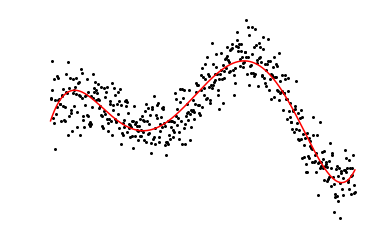

In [57]:
# Might be possible to apply linear regression to Augmented dataset
regr = linear_model.LinearRegression()
regr.fit(x_augmented,y)
print('prediction scrore : {}'.format(regr.score(x_augmented,y)))
print('regression coef : {}'.format(regr.coef_))
#create plot versions of X and y arrays
plt.plot(x,y, 'o', color='black',markersize =2)
plt.plot(x,regr.predict(x_augmented), '-', color='red')
plt.axis('off')
plt.show()

In [ ]:
# cas d'un dataset cercle : X_augmented = np.array([X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2).T